In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글폰트 지정
plt.rcParams['axes.unicode_minus']=False # 한글폰트 사용 시 -기호 깨지는 문제 해결

# 나머지(반입량, 경제 관련) 독립변수

In [9]:
df_반입량 = pd.read_excel('C:\\Users\\acorn\\Desktop\\배추_반입량.xlsx')
df_반입량.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\acorn\\Desktop\\배추_반입량.xlsx'

In [7]:
df_경제독립변수 = pd.read_excel('C:\\Users\\acorn\\Desktop\\데이터 합.xlsx')
df_경제독립변수 = df_경제독립변수.rename(columns={'분류':'날짜'})
df_경제독립변수 = df_경제독립변수[['날짜', 'GDP(10억원단위)', '한은금리', '시간급', '자동차용경유']]
df_독립변수_나머지 = pd.merge(df_반입량, df_경제독립변수, on='날짜', how='inner')
df_독립변수_나머지.head()

NameError: name 'df_경제독립변수' is not defined

# 종속변수

In [6]:
df_가격 = pd.read_csv('C:\\Users\\acorn\\Desktop\\식품예측 데이터\\일별소매가\\배추_상품_일별소매가.csv', encoding = 'ms949')
# 컬럼명 수정
df_가격 = df_가격.rename(columns={'구분':'날짜'})
# 날짜 datetime 형변환
df_가격['날짜'] = pd.to_datetime(df_가격['날짜'])
# 가격 숫자형 변환
columns_to_convert = ['평균', '전통시장', '유통업체']
df_가격[columns_to_convert] = df_가격[columns_to_convert].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
# 결측치 처리
df_가격 = df_가격.ffill()
# 소비자가와 비슷한 가격 '유통업체' 선택
df_가격 = df_가격[['날짜', '유통업체']]
df_가격.head()

,날짜,유통업체
0,2014-01-02,2148.0
1,2014-01-03,2148.0
2,2014-01-04,2148.0
3,2014-01-05,2148.0
4,2014-01-06,2098.0


## merged df 생성

# 독립변수와 품목 가격 merge

In [7]:
df = pd.merge(df_독립변수_나머지, df_가격, on='날짜', how='inner')
# df = pd.merge(df_광주, df_날씨와합칠, on='날짜', how='inner')
# df.drop(columns = ['지역'], inplace = True)

df['연도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month

df.head()

,날짜,총반입량,GDP(10억원단위),한은금리,시간급,자동차용경유,유통업체,연도,월
0,2024-09-30,467,572413.3,3.5,9860,1423.10,8049.0,2024,9
1,2024-09-28,474,572413.3,3.5,9860,1425.01,8159.0,2024,9
2,2024-09-27,625,572413.3,3.5,9860,1427.87,8159.0,2024,9
3,2024-09-26,653,572413.3,3.5,9860,1429.96,7843.0,2024,9
4,2024-09-25,537,572413.3,3.5,9860,1432.49,7264.0,2024,9


# 데이터프레임 저장

In [13]:
df.to_pickle("df_가격으로만.pkl")

# 데이터프레임 불러오기

In [12]:
df = pd.read_pickle('C:/Users/정태빈/Downloads/df_가격으로만.pkl')
df

,날짜,총반입량,GDP(10억원단위),한은금리,시간급,자동차용경유,유통업체,연도,월
0,2024-09-30,467,572413.3,3.5,9860,1423.10,8049.0,2024,9
1,2024-09-28,474,572413.3,3.5,9860,1425.01,8159.0,2024,9
2,2024-09-27,625,572413.3,3.5,9860,1427.87,8159.0,2024,9
3,2024-09-26,653,572413.3,3.5,9860,1429.96,7843.0,2024,9
4,2024-09-25,537,572413.3,3.5,9860,1432.49,7264.0,2024,9
...,...,...,...,...,...,...,...,...,...
3271,2014-01-08,337,442669.9,2.5,5210,1707.70,2086.0,2014,1
3272,2014-01-07,446,442669.9,2.5,5210,1707.73,2084.0,2014,1
3273,2014-01-06,546,442669.9,2.5,5210,1707.80,2098.0,2014,1
3274,2014-01-04,387,442669.9,2.5,5210,1707.61,2148.0,2014,1


# 상관도 보기

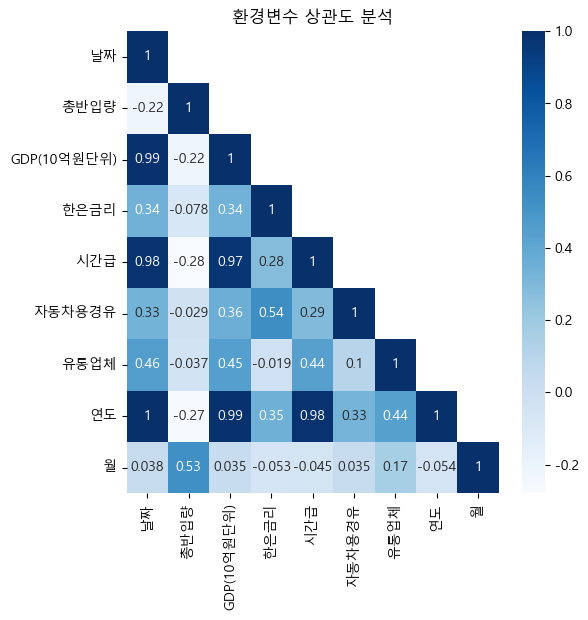

날짜             0.457801
총반입량          -0.037171
GDP(10억원단위)    0.446128
한은금리          -0.019039
시간급            0.440094
자동차용경유         0.104396
유통업체           1.000000
연도             0.442157
월              0.168048
Name: 유통업체, dtype: float64

In [4]:
df_corr = df.corr()
# 컬럼들 사이 상관계수 확인. 기울기가 |1|에 가까울수록 상관도 큼

plt.figure(figsize=(6, 6)) # 시본 히트맵 그리기
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_corr, mask = mask, annot=True, cmap='Blues')
plt.title('환경변수 상관도 분석')

plt.savefig('환경변수 상관도 분석.png', dpi=200)
plt.show()

df_corr.loc['유통업체']

# 그래프

In [5]:
# 그래프 그릴 때 사용할 컬럼 '년월' 생성
df['년월'] = df['날짜'].dt.strftime('%Y-%m')

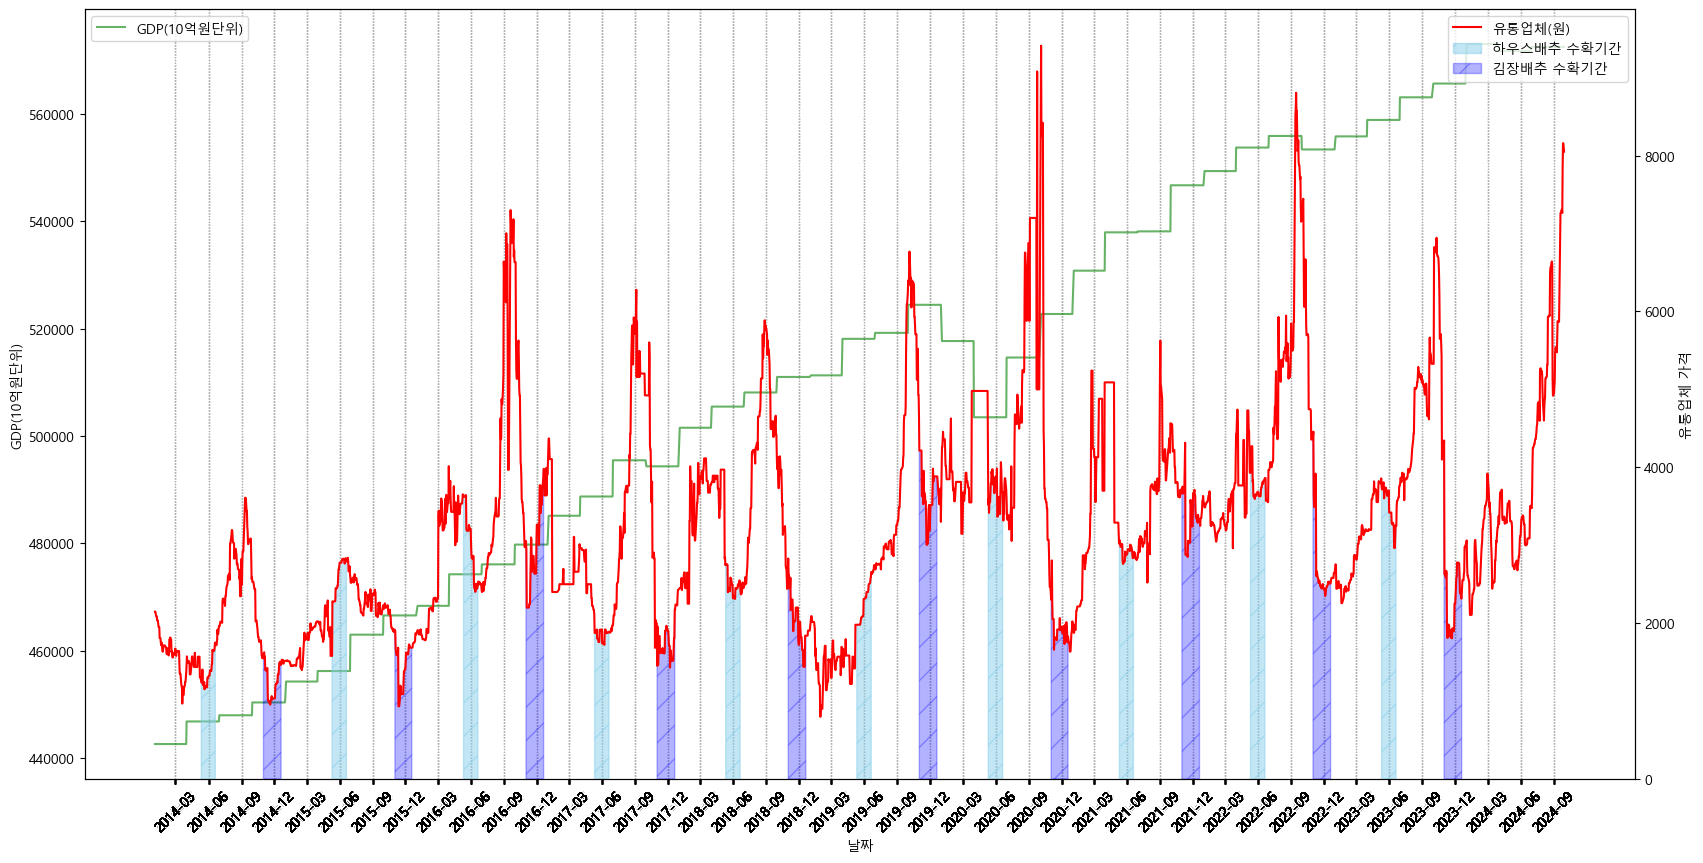

In [12]:
fig, ax1 = plt.subplots(figsize=(20, 10))

# 단위가 다르기 때문에 여러 컬럼들 같이 그릴 때 ax1에서 그릴지 ax2에서 그릴지 판단해서 옮겨야 할 수 있음
# 총반입량
# ax1.plot(df['날짜'], df['총반입량'], alpha=0.6, label='총반입량', color='green')

# GDP(10억원단위)
ax1.plot(df['날짜'], df['GDP(10억원단위)'], alpha=0.6, color='green', label='GDP(10억원단위)')

# 한은금리
# ax1.plot(df['날짜'], df['한은금리'], alpha=0.6, color='green', label='한은금리(%)')

# 시간급
# ax1.plot(df['날짜'], df['시간급'], alpha=0.6, color='green', label='시간급여(원)')

# 자동차용경유
# ax1.plot(df['날짜'], df['자동차용경유'], color='black', label='경유가격(원)')


# x축 공유하는 오른쪽 y축 그래프
ax2 = ax1.twinx() 
ax2.plot(df['날짜'], df['유통업체'], color='red', label='유통업체(원)')

# xticks 위치 설정
xticks_list = df[df['월'] % 3 == 0]['년월']
ax1.set_xticks(xticks_list)
ax1.set_xticklabels(xticks_list, rotation=45)


# 수학기간 fill_between으로 표시하기
# 수확기간_1 봄배추
harvest_start_month_day_1 = '05-11'
harvest_end_month_day_1 = '06-20'
# 수확기간_2 가을배추
harvest_start_month_day_2 = '11-01'
harvest_end_month_day_2 = '12-20'

# 수학기간_1
first = True  # 첫 번째 반복인지 여부를 나타내는 플래그
for year in range(df['날짜'].dt.year.min(), df['날짜'].dt.year.max()):
    harvest_start_1 = pd.Timestamp(f'{year}-{harvest_start_month_day_1}')
    harvest_end_1 = pd.Timestamp(f'{year}-{harvest_end_month_day_1}')

    mask = (df['날짜'] >= harvest_start_1) & (df['날짜'] <= harvest_end_1)
    
    # 첫 번째 호출에만 label을 추가
    if first:
        ax2.fill_between(df['날짜'][mask], df['유통업체'][mask], 
                         color='skyblue', alpha=0.5, hatch='/', label='하우스배추 수확기간')
        first = False  # 이후 호출에서는 label을 추가하지 않음
    else:
        ax2.fill_between(df['날짜'][mask], df['유통업체'][mask], 
                         color='skyblue', alpha=0.5, hatch='/')
# 수학기간_2
first = True  # 첫 번째 반복인지 여부를 나타내는 플래그
for year in range(df['날짜'].dt.year.min(), df['날짜'].dt.year.max()):
    harvest_start_2 = pd.Timestamp(f'{year}-{harvest_start_month_day_2}')
    harvest_end_2 = pd.Timestamp(f'{year}-{harvest_end_month_day_2}')

    mask = (df['날짜'] >= harvest_start_2) & (df['날짜'] <= harvest_end_2)
    
    # 첫 번째 호출에만 label을 추가
    if first:
        ax2.fill_between(df['날짜'][mask], df['유통업체'][mask], 
                         color='blue', alpha=0.3, hatch='/', label='김장배추 수확기간')
        first = False  # 이후 호출에서는 label을 추가하지 않음
    else:
        ax2.fill_between(df['날짜'][mask], df['유통업체'][mask], 
                         color='blue', alpha=0.3, hatch='/')



# 레이블과 축 설정
ax1.set_xlabel('날짜')
ax1.set_ylabel('GDP(10억원단위)')
ax2.set_ylabel('유통업체 가격')
ax2.set_ylim(0)
ax1.grid(axis='x', alpha=0.2, ls=':') # , ls=':'


# 범례 위치
ax1.legend(loc=2)
ax2.legend(loc=1)


# 제목
# ax1.set_title('')

plt.show()

# 추가비교작업

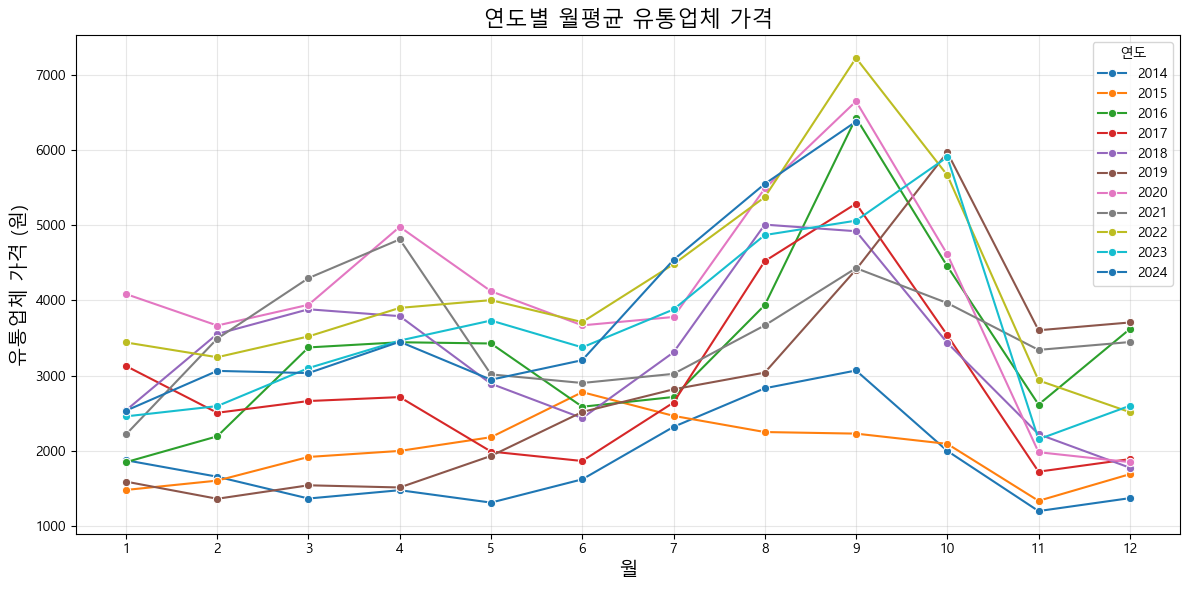

In [21]:
# 연도별 월평균 가격을 계산
df_monthly = df.groupby(['연도', '월']).mean().reset_index()

# 스타일 설정
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10", len(df_monthly['연도'].unique()))  # 연도별로 색상 구분

# 그래프 생성
sns.lineplot(
    data=df_monthly,
    x='월', 
    y='유통업체', 
    hue='연도', 
    palette=palette,  # 색상 팔레트 지정
    marker='o'        # 데이터 포인트 표시
)

# 그래프 제목 및 레이블
plt.title("연도별 월평균 유통업체 가격", fontsize=16)
plt.xlabel("월", fontsize=14)
plt.ylabel("유통업체 가격 (원)", fontsize=14)

# 축 범위 설정 (필요 시)
plt.xticks(range(1, 13))  # 월은 1~12로 설정
plt.grid(alpha=0.3)

# 범례 설정
plt.legend(title="연도", loc='upper right', fontsize=10)

# 그래프 표시
plt.tight_layout()
plt.show()


# 수확기간별 분석

In [20]:
spring_mask = (df['월'] >= 5) & (df['월'] <= 6)
fall_mask = (df['월'] >= 10) & (df['월'] <= 11)

spring_avg = df[spring_mask]['유통업체'].mean()
fall_avg = df[fall_mask]['유통업체'].mean()
print(f"봄배추 평균 가격: {spring_avg}, 김장배추 평균 가격: {fall_avg}")

#  김장배추보다 수확량이 더 많은 봄배추가 평균가격이 더 저렴하게 측정된다.

봄배추 평균 가격: 2826.4086956521737, 김장배추 평균 가격: 3243.788349514563
